In [11]:
# Imports 
import GetTripModel
import importlib

In [2]:
model = None

In [12]:
importlib.reload(GetTripModel)

class TrainingGetTripModel(GetTripModel.SpacyGetTripModel):
    def prepare_data(self, data):
        prepared_data = []
        for item in data:
            text = item['sentence']
            ents = []
            # This model only works with real trip sentences, ie with a departure and an arrival
            if len(item['entities']) != 2:
                continue
            for ent in item['entities']:
                ents.append((ent['start'], ent['end'], ent['label']))

            prepared_data.append((text, {"entities": ents}))
        return prepared_data

# Refresh the methods of the model if it was already instanciated
if model:
    model.__class__ = TrainingGetTripModel
    TrainingGetTripModel.refresh_methods(model)

In [13]:
# Load data
model = TrainingGetTripModel()

# Training

In [14]:
num_positives = len([item for item in model.train_data if len(item[1]["entities"]) > 0])
num_negatives = len([item for item in model.train_data if len(item[1]["entities"]) == 0])
print(f"Exemples positifs : {num_positives}, Exemples négatifs : {num_negatives}")
print(f"Exemple d'entraînement : {model.train_data[0]}")


Exemples positifs : 2415, Exemples négatifs : 0
Exemple d'entraînement : ('je pars de la ferte-sous-jouarre pour aller à bois-le-roi ce week-end avec ma famille.', {'entities': [(11, 32, 'VILLE_DEPART'), (46, 57, 'VILLE_DESTINATION')]})


In [15]:
# Model creation
model.load_model("fr_core_news_md")

In [16]:
# Training
model.train(3, drop=0.30)

Iteration 1, losses : {'ner': 1407.7627584500256}
Iteration 2, losses : {'ner': 56.945424311085134}
Iteration 3, losses : {'ner': 16.802522524268742}
Iteration 4, losses : {'ner': 34.74233306029323}
Iteration 5, losses : {'ner': 35.88434957174362}
Iteration 6, losses : {'ner': 59.649397002243276}
Iteration 7, losses : {'ner': 69.84481318450527}
Iteration 8, losses : {'ner': 34.78488659255137}
Iteration 9, losses : {'ner': 12.580144885682543}
Iteration 10, losses : {'ner': 3.1699485930258438}


In [17]:
# Save the model
model.save("model_ner_trained")

# Testing

Model: Trained model


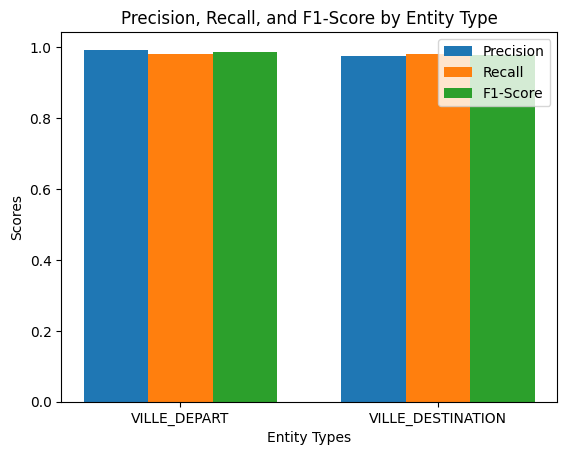

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.9837189374464439,
 'ents_r': 0.9811965811965812,
 'ents_f': 0.9824561403508772,
 'ents_per_type': {'VILLE_DEPART': {'p': 0.9930795847750865,
   'r': 0.9811965811965812,
   'f': 0.9871023215821152},
  'VILLE_DESTINATION': {'p': 0.9745331069609507,
   'r': 0.9811965811965812,
   'f': 0.9778534923339012}}}

In [18]:
model.evaluate_model(model.test_data, "Trained model")

# Validation

Model: Trained model


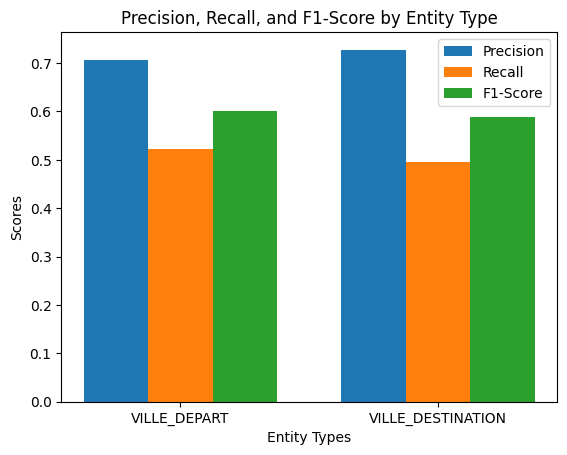

{'token_acc': 1.0,
 'token_p': 1.0,
 'token_r': 1.0,
 'token_f': 1.0,
 'pos_acc': None,
 'morph_acc': None,
 'morph_micro_p': None,
 'morph_micro_r': None,
 'morph_micro_f': None,
 'morph_per_feat': None,
 'sents_p': None,
 'sents_r': None,
 'sents_f': None,
 'dep_uas': None,
 'dep_las': None,
 'dep_las_per_type': None,
 'tag_acc': None,
 'lemma_acc': None,
 'ents_p': 0.7167019027484144,
 'ents_r': 0.5085,
 'ents_f': 0.5949107926294237,
 'ents_per_type': {'VILLE_DEPART': {'p': 0.7066395663956639,
   'r': 0.5215,
   'f': 0.6001150747986191},
  'VILLE_DESTINATION': {'p': 0.7276064610866373,
   'r': 0.4955,
   'f': 0.5895300416418797}}}

In [19]:
model.evaluate_model(model.validation_data, "Trained model")